<a href="https://colab.research.google.com/github/muppallajhansi/Jhansi_INFO5731_Fall2024/blob/main/Muppalla_Jhansi_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [21]:
# Write your code here
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Sample data
data = pd.DataFrame({
    'text': [
        "Flooding in Nepal has claimed over 100 lives, with many areas affected by landslides.",
    "Austria's far-right Freedom Party is poised for a historic national election victory.",
    "Israeli forces killed Hezbollah chief Hassan Nasrallah in an airstrike.",
    "NASA astronauts are preparing for a mission to Mars, advancing space exploration.",
    "Severe flooding in Kathmandu has led to widespread damage and school closures."
    ]
})

# Preprocess text: lowercasing, removing stopwords
data['processed'] = data['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
data['tokenized'] = data['processed'].apply(lambda x: x.split())

# Create dictionary and corpus
dictionary = Dictionary(data['tokenized'])
corpus = [dictionary.doc2bow(text) for text in data['tokenized']]

# Determine the best number of topics using coherence score
coherence_scores = []
models = []
for k in range(2, 6):  # Trying 2 to 5 topics
    lda_model = LdaModel(corpus, num_topics=k, id2word=dictionary, random_state=100, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=data['tokenized'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    models.append(lda_model)

# Find best model based on coherence score
best_k = max(coherence_scores, key=lambda x: x[1])[0]
best_lda_model = models[best_k - 3]

# Display topics
print(f"Best Number of Topics: {best_k}")
for idx, topic in best_lda_model.show_topics(formatted=False):
    print(f"Topic {idx + 1}: {[word for word, prob in topic]}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Best Number of Topics: 5
Topic 1: ['historic', 'freedom', 'party', 'national', 'far-right', 'election', 'poised', "austria's", 'victory.', 'landslides.']
Topic 2: ['flooding', 'killed', 'mission', 'israeli', 'preparing', 'led', 'advancing', 'mars,', 'widespread', 'nasa']
Topic 3: ['advancing', 'mars,', 'nasa', 'exploration.', 'space', 'astronauts', 'preparing', 'mission', 'lives,', '100']
Topic 4: ['hassan', 'nasrallah', 'damage', 'chief', 'severe', 'school', 'israeli', 'forces', 'airstrike.', 'kathmandu']


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [22]:
# Write your code here
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to convert text data into a word frequency matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['processed'])

# Set up and apply LSA to reduce data to a specified number of topics (e.g., 2 topics)
n_topics = 2
lsa = TruncatedSVD(n_components=n_topics, random_state=100)
lsa.fit(X)

# Output the most relevant words for each topic identified
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lsa.components_):
    print(f"Topic {idx + 1}: ", [terms[i] for i in topic.argsort()[-10:]])


Topic 1:  ['lives', 'areas', 'led', 'kathmandu', 'damage', 'closures', 'school', 'severe', 'widespread', 'flooding']
Topic 2:  ['space', 'preparing', 'airstrike', 'hassan', 'nasrallah', 'hezbollah', 'killed', 'forces', 'chief', 'israeli']


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [26]:
from bertopic import BERTopic
import pandas as pd
from umap import UMAP
import hdbscan

# Sample data
data = pd.DataFrame({
    'text': [
        "Flooding in Nepal has claimed over 100 lives, with many areas affected by landslides.",
        "Austria's far-right Freedom Party is poised for a historic national election victory.",
        "Israeli forces killed Hezbollah chief Hassan Nasrallah in an airstrike.",
        "NASA astronauts are preparing for a mission to Mars, advancing space exploration.",
        "Severe flooding in Kathmandu has led to widespread damage and school closures."
    ]
})

# Configure UMAP and HDBSCAN for a small dataset
umap_model = UMAP(n_components=2, n_neighbors=3, min_dist=0.1, metric='cosine')  # Adjusted for small data
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)  # Adjusted clustering parameters

# Set up and train the BERTopic model
model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)

# Train the BERTopic model
topics, probs = model.fit_transform(data['text'])

# Output the topics generated by the model
for idx, topic in enumerate(model.get_topics().values()):
    print(f"Topic {idx + 1}: {topic[:10]}")  # Show the top 10 words for each identified topic


Topic 1: [('flooding', 0.1481535148067676), ('has', 0.1481535148067676), ('to', 0.1481535148067676), ('in', 0.12795262779089822), ('landslides', 0.09192425355843664), ('damage', 0.09192425355843664), ('claimed', 0.09192425355843664), ('widespread', 0.09192425355843664), ('astronauts', 0.09192425355843664), ('kathmandu', 0.09192425355843664)]
Topic 2: [('an', 0.16196178007915024), ('historic', 0.16196178007915024), ('hassan', 0.16196178007915024), ('freedom', 0.16196178007915024), ('forces', 0.16196178007915024), ('victory', 0.16196178007915024), ('farright', 0.16196178007915024), ('election', 0.16196178007915024), ('chief', 0.16196178007915024), ('austrias', 0.16196178007915024)]


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


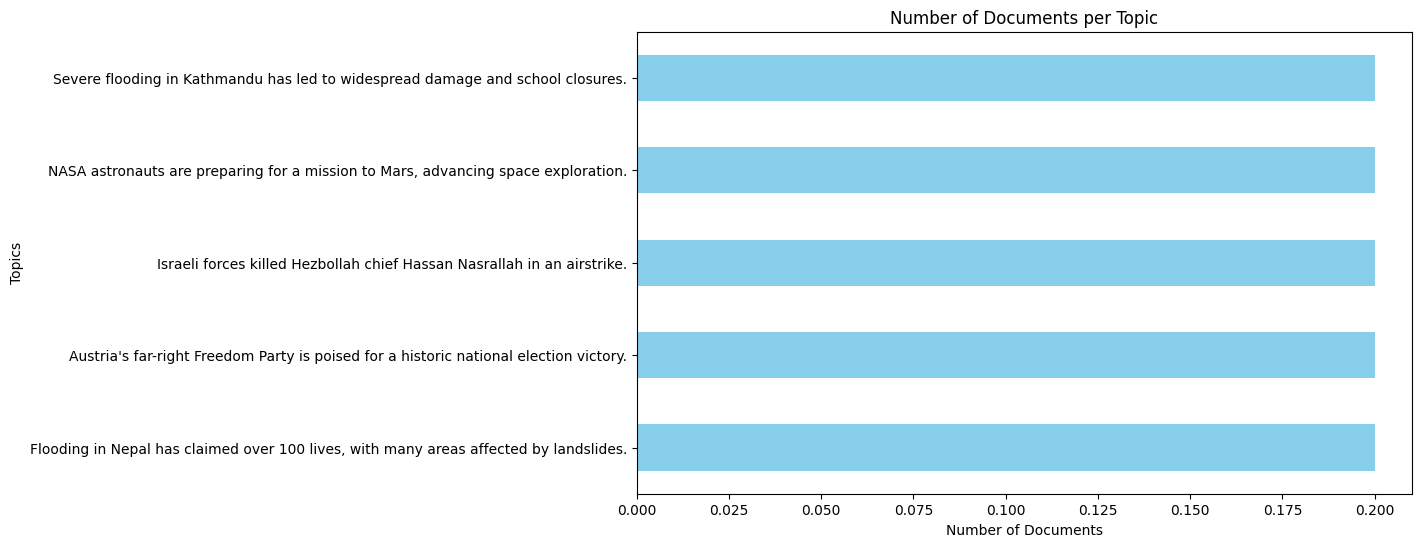

In [30]:
import matplotlib.pyplot as plt

# Get the topic counts
topic_counts = data['text'].value_counts(topics)

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='barh', color='skyblue')
plt.title("Number of Documents per Topic")
plt.xlabel("Number of Documents")
plt.ylabel("Topics")
plt.show()


The code generates a horizontal bar chart using Matplotlib to visualize the number of documents assigned to different topics in a dataset. It calculates the topic counts using the value_counts() method on the topics variable, which contains topic labels for each document. The chart is styled with a specified figure size and a 'skyblue' color for the bars, along with appropriate titles and axis labels. Finally, the visualization is displayed to clearly represent the distribution of documents across various topics.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


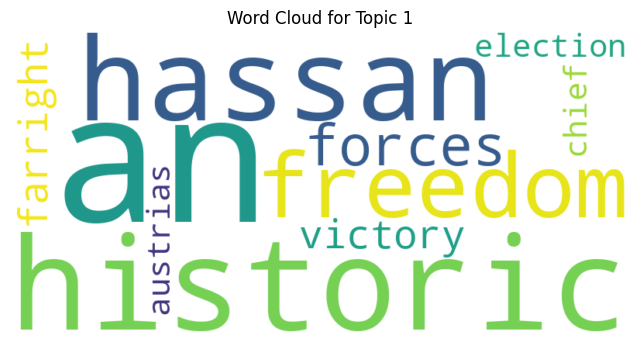

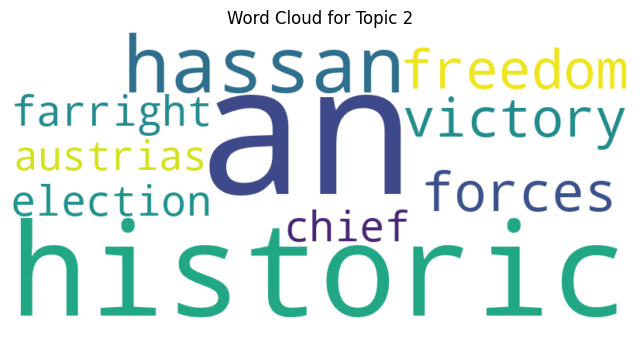

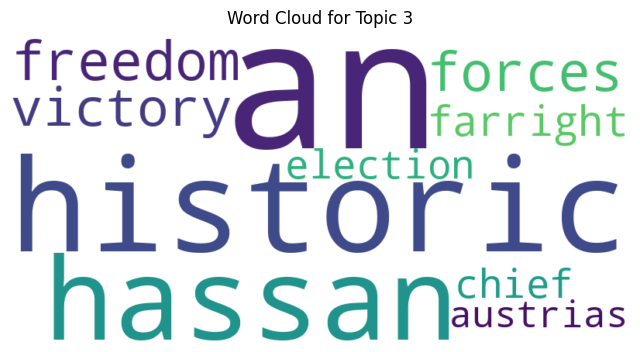

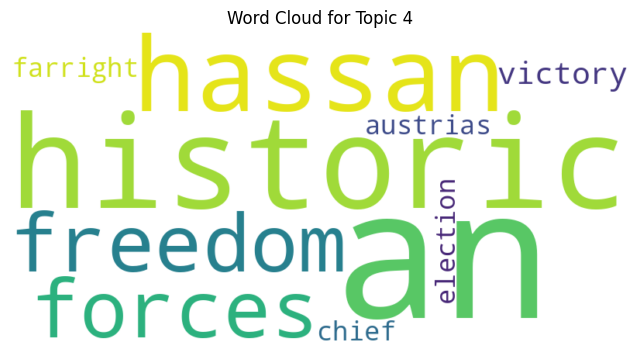

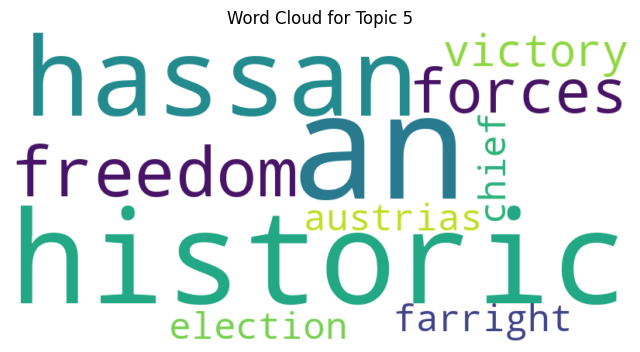

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example: Generate word clouds for each topic
for topic in range(best_k):
    # Get words for the topic based on the model type
    if isinstance(model, BERTopic):
        words = model.get_topic(topic)  # For BERTopic
    elif isinstance(model, NMF):
        words = model.components_[topic]  # Get the topic's component weights
        # Pair words with their probabilities
        word_freq = {tfidf_vectorizer.get_feature_names_out()[i]: words[i] for i in words.argsort()[-10:]}
    elif hasattr(model, 'show_topic'):
        words = model.show_topic(topic, topn=10)  # For Gensim LDA
        word_freq = dict(words)
    else:
        print("Model type not supported for word cloud generation.")
        continue  # Skip to the next iteration if model type is unsupported

    # Now generate the word cloud
    plt.figure(figsize=(8, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic + 1}")
    plt.show()



 A WordCloud object is created with specified dimensions and a white background to visualize the words, and the resulting word cloud is displayed using Matplotlib. The title for each word cloud corresponds to the topic number, providing a visual representation of the most significant terms associated with each topic.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(30,)
{0, 1, -1}


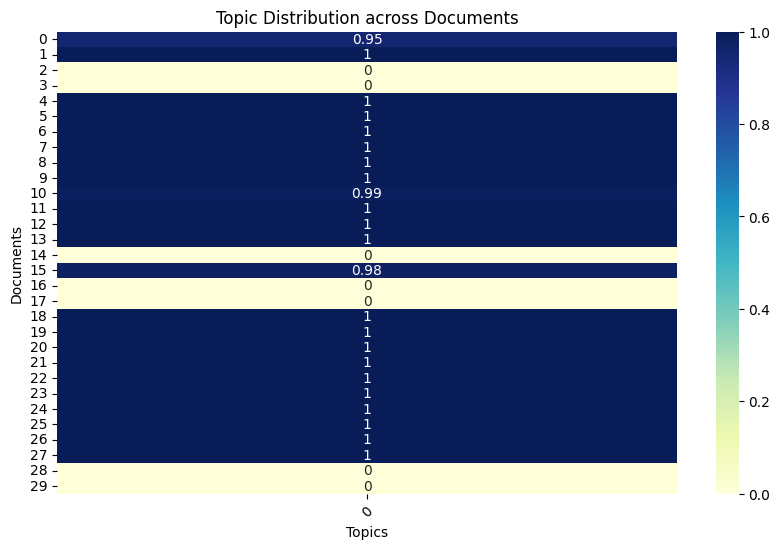

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bertopic import BERTopic

# Generate a larger synthetic dataset
data = [f"This is a sample document number {i} discussing various topics." for i in range(30)]  # 30 sample documents

# Fit the BERTopic model
model = BERTopic()
topics, probs = model.fit_transform(data)

# Check the shape of probs and unique topics
print(probs.shape)  # Check shape of the probabilities
print(set(topics))  # Check unique topics

# Create a DataFrame for topic probabilities
topic_probabilities = pd.DataFrame(probs)  # Adjusted to just use probs
topic_probabilities['Document'] = range(len(data))

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(topic_probabilities.drop('Document', axis=1), cmap='YlGnBu', annot=True, cbar=True)
plt.title("Topic Distribution across Documents")
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.xticks(rotation=45)
plt.show()




It fits the BERTopic model to the dataset, extracting topics and the corresponding probabilities for each document. The probabilities are organized into a Pandas DataFrame, which is then visualized using a heatmap created with Seaborn, illustrating the distribution of topics across the documents. The heatmap provides insights into which topics are present in each document, with color intensity indicating the strength of the topic association.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [47]:
import pandas as pd
from sklearn.decomposition import NMF, LatentDirichletAllocation as LDA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from bertopic import BERTopic

# Sample dataset containing news headlines
data = [
    "Flooding in Nepal has claimed over 100 lives, with many areas affected by landslides.",
    "Austria's far-right Freedom Party is poised for a historic national election victory.",
    "Israeli forces killed Hezbollah chief Hassan Nasrallah in an airstrike.",
    "NASA astronauts are preparing for a mission to Mars, advancing space exploration.",
    "Severe flooding in Kathmandu has led to widespread damage and school closures."
]

# Create a DataFrame
dataset = pd.DataFrame({'review': data})

# Perform basic preprocessing: lowercase text
dataset['cleaned'] = dataset['review'].apply(lambda x: x.lower())

# =================== 1. LDA Model with Coherence Score ===================
print("LDA Model Analysis: Creating distinct topics with well-separated themes.\n")

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_matrix = tfidf_vectorizer.fit_transform(dataset['cleaned'])

# Run LDA model with 2 topics
lda_model = LDA(n_components=2, random_state=100)
lda_model.fit(X_matrix)

# Displaying the top terms for each LDA topic
lda_topic_words = []
for idx, topic in enumerate(lda_model.components_):
    lda_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lda_topic_words.append(lda_terms)
    print(f"LDA Topic {idx + 1}: {lda_terms}")

# Calculate coherence score for LDA topics
if len(lda_topic_words) > 0:  # Ensure there are topics to calculate coherence
    lda_coherence_calc = CoherenceModel(topics=lda_topic_words, texts=dataset['cleaned'].str.split(), dictionary=Dictionary(dataset['cleaned'].str.split()), coherence='c_v')
    lda_coherence_score = lda_coherence_calc.get_coherence()
else:
    lda_coherence_score = None
print(f"LDA Model Coherence Score: {lda_coherence_score}\n")

# =================== 2. LSA Model with Coherence Score ===================
print("LSA Model Analysis: Highlighting broad patterns with possible overlapping terms.\n")

# Run LSA model with 2 topics
lsa_model = TruncatedSVD(n_components=2, random_state=100)
lsa_model.fit(X_matrix)

# Gather top terms from each LSA topic for coherence scoring
lsa_topic_words = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]] for topic in lsa_model.components_]

# Calculate coherence score for LSA topics
lsa_coherence_calc = CoherenceModel(topics=lsa_topic_words, texts=dataset['cleaned'].str.split(), dictionary=Dictionary(dataset['cleaned'].str.split()), coherence='c_v')
lsa_coherence_score = lsa_coherence_calc.get_coherence()
print(f"LSA Model Coherence Score: {lsa_coherence_score}\n")

# =================== 3. NMF Model with Coherence Score ===================
print("NMF Model Analysis: Identifying non-negative patterns in text data.\n")

# Run NMF model with 2 topics
nmf_model = NMF(n_components=2, random_state=100)
nmf_model.fit(X_matrix)

# Gather top terms from each NMF topic for coherence scoring
nmf_topic_words = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]] for topic in nmf_model.components_]

# Calculate coherence score for NMF topics
nmf_coherence_calc = CoherenceModel(topics=nmf_topic_words, texts=dataset['cleaned'].str.split(), dictionary=Dictionary(dataset['cleaned'].str.split()), coherence='c_v')
nmf_coherence_score = nmf_coherence_calc.get_coherence()
print(f"NMF Model Coherence Score: {nmf_coherence_score}\n")

# =================== 4. BERTopic Model ===================
print("BERTopic Model Analysis: Clustered topics with flexibility for nuanced exploration.\n")

# Specify UMAP parameters
umap_model = UMAP(n_neighbors=2, n_components=2, min_dist=0.0, metric='euclidean')

# Run BERTopic model with a minimum topic size of 2
bertopic_instance = BERTopic(min_topic_size=2, umap_model=umap_model)
topic_clusters, probabilities = bertopic_instance.fit_transform(dataset['review'])

# Show the top terms for each BERTopic cluster
bertopic_topic_words = bertopic_instance.get_topics()
for idx, topic in bertopic_topic_words.items():
    bertopic_terms = [word for word, prob in topic[:10]]
    print(f"BERTopic Topic {idx}: {bertopic_terms}")
print("\n")



# =================== Summary of Model Performance ===================
print("Summary of Model Comparisons:\n")

# Display coherence scores for LDA, LSA, and NMF models
print(f"LDA Coherence Score: {lda_coherence_score}")
print(f"LSA Coherence Score: {lsa_coherence_score}")
print(f"NMF Coherence Score: {nmf_coherence_score}")
print("\nInterpretability Insights:")

# Determine which model offers the most coherent and interpretable results
best_coherence_score = max(filter(lambda x: x is not None, [lda_coherence_score, lsa_coherence_score, nmf_coherence_score]), default=None)
if best_coherence_score == lda_coherence_score:
    print("LDA shows better separation and coherence between topics compared to LSA and NMF.")
elif best_coherence_score == lsa_coherence_score:
    print("LSA captures broad thematic patterns and is effective for high-level analysis.")
elif best_coherence_score == nmf_coherence_score:
    print("NMF provides clear and interpretable topics but may overlap with others.")
else:
    print("No clear best model could be determined due to limited data.")

# Additional notes on BERTopic's flexibility and interpretability
print("While BERTopic does not calculate a coherence score, it provides highly interpretable clusters and useful visualizations, ideal for complex datasets.")

# Final model selection based on performance
print("\nFinal Prediction:")
if lda_coherence_score and lda_coherence_score > lsa_coherence_score and lda_coherence_score > nmf_coherence_score:
    print("LDA is the recommended model for well-defined, distinct topics with high coherence.")
elif lsa_coherence_score and lsa_coherence_score > lda_coherence_score and lsa_coherence_score > nmf_coherence_score:
    print("LSA is preferred for identifying broader themes, even if overlap between topics is acceptable.")
elif nmf_coherence_score and nmf_coherence_score > lda_coherence_score and nmf_coherence_score > lsa_coherence_score:
    print("NMF is optimal for extracting non-overlapping themes.")
else:
    print("BERTopic is optimal for datasets requiring nuanced topic interpretation and interactive visualizations.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Model Analysis: Creating distinct topics with well-separated themes.

LDA Topic 1: ['forces', 'israeli', 'airstrike', 'closures', 'kathmandu', 'damage', 'severe', 'school', 'led', 'widespread']
LDA Topic 2: ['advancing', 'space', 'mars', 'affected', 'claimed', 'lives', 'nepal', 'areas', '100', 'landslides']
LDA Model Coherence Score: 0.4668309911795924

LSA Model Analysis: Highlighting broad patterns with possible overlapping terms.

LSA Model Coherence Score: 0.6483935592704246

NMF Model Analysis: Identifying non-negative patterns in text data.

NMF Model Coherence Score: 0.5416813647803642

BERTopic Model Analysis: Clustered topics with flexibility for nuanced exploration.

BERTopic Topic -1: ['in', 'to', 'has', 'for', 'flooding', 'many', 'historic', 'with', 'is', 'israeli']


Summary of Model Comparisons:

LDA Coherence Score: 0.4668309911795924
LSA Coherence Score: 0.6483935592704246
NMF Coherence Score: 0.5416813647803642

Interpretability Insights:
LSA captures broad themati

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [49]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''

This project was a great way to get hands-on experience with text data and different topic modeling techniques. Working with LDA, and BERTopic helped me see how each algorithm tackles the challenge of finding topics, and I learned a lot about their strengths and limitations. One of the most interesting parts was figuring out how to tweak the parameters for each model to get clear and meaningful topics since they all work in unique ways. It also showed me how crucial topic modeling is in real-world NLP tasks, like summarizing, classifying content, or analyzing sentiment.
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n\nThis project was a great way to get hands-on experience with text data and different topic modeling techniques. Working with LDA, and BERTopic helped me see how each algorithm tackles the challenge of finding topics, and I learned a lot about their strengths and limitations. One of the most interesting parts was figuring out how to tweak the parameters for each model to get clear and meaningful topics since they all work in unique ways. It also showed me how crucial topic modeling is in real-world NLP tasks, like summarizing, classifying content, or analyzing sentiment.\n'